In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
file_path = "bank-additional-full.csv"  
df = pd.read_csv(file_path, sep=';')

In [77]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

Shape of dataset: (41188, 21)

Column names:
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [78]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [80]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [81]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [82]:
print("\nCount of 'unknown' entries per column:")
for col in df.columns:
    if df[col].dtype == 'object':
        unknown_count = (df[col] == 'unknown').sum()
        if unknown_count > 0:
            print(f"{col}: {unknown_count}")


Count of 'unknown' entries per column:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990


In [83]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [84]:
data=df.copy()

In [85]:
data.replace('unknown', np.nan, inplace=True)

In [86]:
# Quick check of missing after replacement
print("Missing values per column after replacing 'unknown':")
print(data.isnull().sum())

Missing values per column after replacing 'unknown':
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [87]:
# Step 2A — Handle Missing Values After Replacing 'unknown'

# Fill columns with small missing counts using mode
for col in ['job', 'marital', 'education', 'housing', 'loan']:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# For 'default', restore NaNs as a separate category ("unknown")
data['default'].fillna('unknown', inplace=True)

# Verify missing values again
print("✅ Missing values after imputation:")
print(data.isnull().sum())


✅ Missing values after imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


/var/folders/b9/4b03fg7n6yd3nky9m5wlf4g80000gn/T/ipykernel_20722/3268921625.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)
/var/folders/b9/4b03fg7n6yd3nky9m5wlf4g80000gn/T/ipykernel_20722/3268921625.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [89]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [90]:
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [91]:
print("\nCategorical columns:", cat_cols)
print("\nNumeric columns:", num_cols)


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [92]:
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
print("\nShape after encoding:", data_encoded.shape)


Shape after encoding: (41188, 49)


In [93]:
cleaned_unscaled = data_encoded.copy()
cleaned_unscaled.to_csv("bank_marketing_cleaned_unscaled.csv", index=False)
print("bank_marketing_cleaned_unscaled.csv")

bank_marketing_cleaned_unscaled.csv


In [94]:
from IPython.display import FileLink, FileLinks
import os

# Create a download link for a specific file
FileLink('bank_marketing_cleaned_unscaled.csv')

/Users/divyanshdoshi/Desktop/DCU/Stats/Project/bank_marketing_cleaned_unscaled.csv

In [95]:
scaler = StandardScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

In [96]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Data ready for modeling!")
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

 Data ready for modeling!
Training set: (32950, 48)
Test set: (8238, 48)


In [97]:
cleaned_scaled = pd.concat([X, y], axis=1).reset_index(drop=True)
cleaned_scaled.to_csv("bank_marketing_cleaned_scaled.csv", index=False)
print("bank_marketing_cleaned_scaled.csv")

bank_marketing_cleaned_scaled.csv


In [98]:
from IPython.display import FileLink, FileLinks
import os

# Create a download link for a specific file
FileLink('bank_marketing_cleaned_scaled.csv')

/Users/divyanshdoshi/Desktop/DCU/Stats/Project/bank_marketing_cleaned_scaled.csv

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
print(data_encoded['y'].unique())
print(data_encoded['y'].dtype())


[-0.35630932  2.80655022]


TypeError: 'numpy.dtypes.Float64DType' object is not callable

In [107]:
# Restore y to binary
data_encoded['y'] = (data_encoded['y'] > 0).astype(int)


In [108]:
print(data_encoded['y'].unique())
print(data_encoded['y'].dtype)


[0 1]
int64


In [109]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [110]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [111]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [113]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy:  0.9160
Precision: 0.7070
Recall:    0.4343
F1 Score:  0.5381
ROC AUC:   0.9425
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



Confusion Matrix: [[7143  167]
 [ 525  403]]


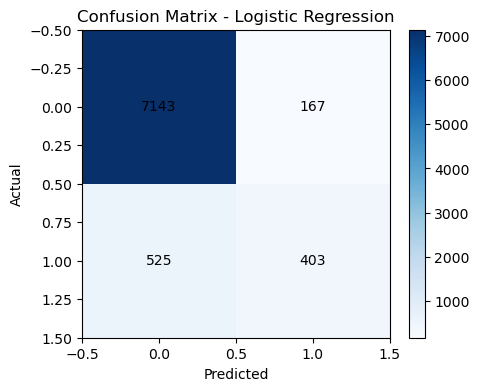

In [114]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

<Figure size 600x500 with 0 Axes>

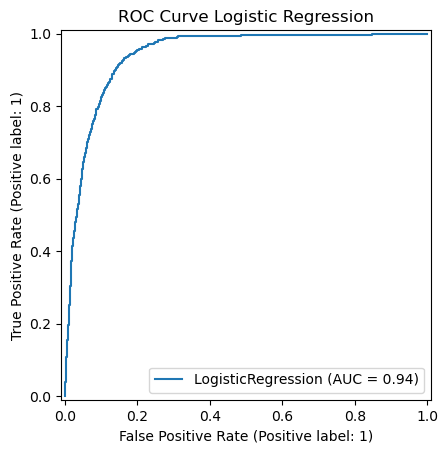

In [116]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]


In [119]:
# Evaluate
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Results
Accuracy: 0.91854819130857
Precision: 0.6992248062015504
Recall: 0.4859913793103448
F1 Score: 0.5734265734265734
ROC-AUC: 0.9461083807019199
Confusion Matrix:
[[7116  194]
 [ 477  451]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.70      0.49      0.57       928

    accuracy                           0.92      8238
   macro avg       0.82      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238



We can see that
Accuracy improved
Recall improved
F1 improved
ROC-AUC improved
Precision slightly dropped,
this mean Random Forest is better than Logistic Regression.

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print("Best RF Parameters:", rf_grid.best_params_)


Best RF Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [121]:
rf_tuned_pred = best_rf.predict(X_test)
rf_tuned_prob = best_rf.predict_proba(X_test)[:, 1]

print("\nTuned Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_tuned_pred))
print("Precision:", precision_score(y_test, rf_tuned_pred))
print("Recall:", recall_score(y_test, rf_tuned_pred))
print("F1 Score:", f1_score(y_test, rf_tuned_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_tuned_prob))



Tuned Random Forest Results
Accuracy: 0.9093226511289147
Precision: 0.5678919729932483
Recall: 0.8157327586206896
F1 Score: 0.6696152145068553
ROC-AUC: 0.9519881539223549


In [122]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 432.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [123]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]


In [124]:
print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_prob))

XGBoost Results
Accuracy: 0.9234037387715465
Precision: 0.6993288590604027
Recall: 0.5614224137931034
F1 Score: 0.6228332337118948
ROC-AUC: 0.9555032076984764


In [125]:
xgb_params = {
    'n_estimators': [200, 400],
    'max_depth': [3, 5],
    'learning_rate': [0.03, 0.1],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

print("Best XGB Parameters:", xgb_grid.best_params_)


Best XGB Parameters: {'colsample_bytree': 1, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


In [126]:
xgb_tuned_pred = best_xgb.predict(X_test)
xgb_tuned_prob = best_xgb.predict_proba(X_test)[:, 1]

print("\nTuned XGBoost Results")
print("Accuracy:", accuracy_score(y_test, xgb_tuned_pred))
print("Precision:", precision_score(y_test, xgb_tuned_pred))
print("Recall:", recall_score(y_test, xgb_tuned_pred))
print("F1 Score:", f1_score(y_test, xgb_tuned_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_tuned_prob))



Tuned XGBoost Results
Accuracy: 0.9224326292789512
Precision: 0.6987620357634112
Recall: 0.5474137931034483
F1 Score: 0.6138972809667673
ROC-AUC: 0.9553727475352611


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, RocCurveDisplay)
import os


In [129]:
for name in ['best_rf', 'best_xgb', 'X_test', 'y_test']:
    if name not in globals():
        raise RuntimeError(f"Variable '{name}' not found in the current session. Please ensure you've trained/loaded the models and prepared X_test, y_test.")


In [130]:
def plot_confusion(cm, title, filename=None):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    if filename:
        plt.savefig(filename, bbox_inches='tight', dpi=150)
    plt.show()

In [131]:
models = {
    'Tuned Random Forest': best_rf,
    'XGBoost': best_xgb
}
results = []
for label, model in models.items():
    y_pred = model.predict(X_test)
    # Some models return class probabilities slightly different; get prob of positive class
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except Exception:
        # fallback for models without predict_proba
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    results.append((label, acc, prec, rec, f1, auc, cm))
    print(f"\n--- {label} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1: {f1:.4f}")
    print(f"ROC-AUC: {auc:.4f}")
    print("Confusion Matrix:\n", cm)


--- Tuned Random Forest ---
Accuracy: 0.9093
Precision: 0.5679
Recall: 0.8157
F1: 0.6696
ROC-AUC: 0.9520
Confusion Matrix:
 [[6734  576]
 [ 171  757]]

--- XGBoost ---
Accuracy: 0.9224
Precision: 0.6988
Recall: 0.5474
F1: 0.6139
ROC-AUC: 0.9554
Confusion Matrix:
 [[7091  219]
 [ 420  508]]


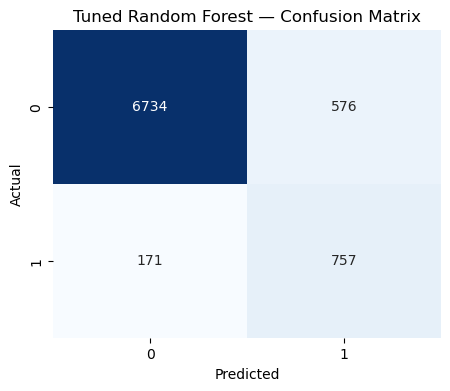

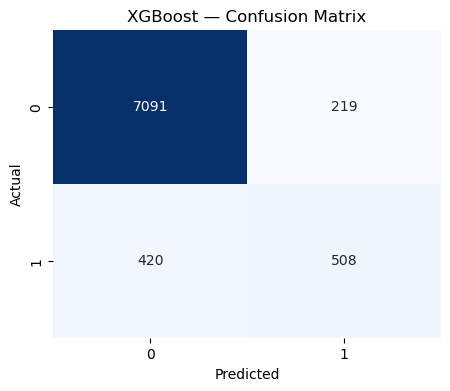

In [132]:
for (label, acc, prec, rec, f1, auc, cm) in results:
    plot_confusion(cm, f"{label} — Confusion Matrix", filename=f"{label.replace(' ','_')}_confusion.png")


<Figure size 700x600 with 0 Axes>

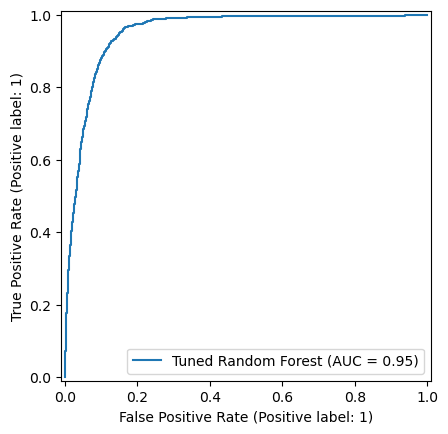

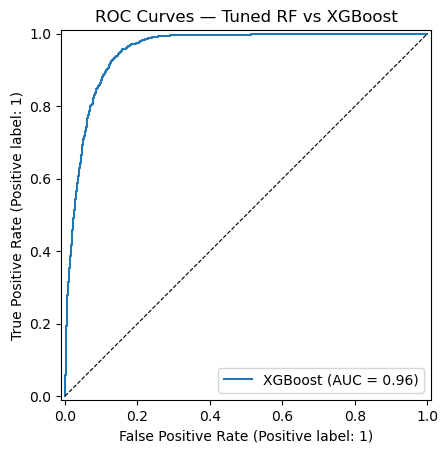

In [133]:
plt.figure(figsize=(7,6))
for label, model in models.items():
    try:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=label)
    except Exception:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=label)
plt.plot([0,1],[0,1], 'k--', linewidth=0.8)
plt.title("ROC Curves — Tuned RF vs XGBoost")
plt.legend()
plt.savefig("roc_comparison_tunedRF_XGB.png", bbox_inches='tight', dpi=150)
plt.show()
